<h1 style="font-size:2.8em; color:#1976d2; font-weight:bold">BÀI TẬP PHÂN LOẠI LOẠI THẢM THỰC VẬT DỰA TRÊN TẬP DỮ LIỆU FOREST COVER TYPE</h1>

# **📘 GIỚI THIỆU BÀI TOÁN**

***BÀI TẬP 1: HỌC MÁY VỚI DỮ LIỆU DẠNG BẢNG (TABULAR DATA)***

* **Giảng viên hướng dẫn**  
  * **Giảng viên: TS.Lê Thành Sách**

* **Nhóm MNTV:**
  * Tên.........................

* **Giới thiệu bài toán**
  * Xây dựng pipeline học máy truyền thống cho dữ liệu dạng bảng, ở đây nhóm sử dụng bộ dữ liệu Amazon Products Sales Dataset 42K+ Items - 2025. 

  * Mục tiêu của các mô hình là dự đoán và đề xuất giá hàng giảm giá cho các sản phẩm có trong bộ dữ liệu.

  * Amazon Products Sales Dataset 42K+ Items - 2025 chứa thông tin về 42,000 sản phẩm điện tử được bày bán trên Amazon, bao gồm tên, loại hàng, giá cả, lượng mua, đánh giá của người mua....

  * Thông tin về bộ dữ liệu:
    * Tổng số mẫu: 42,675 mẫu.
    * Số feature: 17.
    * Format dữ liệu: Numeric và categorical.
    * Link dataset: [Kaggle - Amazon Products Sales](https://www.kaggle.com/datasets/ikramshah512/amazon-products-sales-dataset-42k-items-2025/data?select=amazon_products_sales_data_cleaned.csv)

*  **Mục tiêu của bài toán**
    * ***Xây dựng pipeline hoàn chỉnh***: từ việc tải dữ liệu, xử lý, phân tích (EDA), huấn luyện đến đánh giá mô hình.
    * ***So sánh nhiều mô hình phân loại***: Từ các mô hình đơn giản như Linear Regression, Decision Tree, Random Forest đến các mô hình phức tạp hơn như SVM, MLP.
    * ***Phân tích chi tiết***: Đánh giá thông qua các chỉ số đánh giá mô hình như MSE, MAE, RMSE, R2 và phân tích kết quả.

* **Các mô hình sẽ được triển khai:**
    * 1. ***Linear Regression***
    * 2. ***Random Forest***
    * 3. ***SVM***
    * 4. ***MLP***

****

# **📌 Cài đặt & import các thư viện**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
# Thiết lập style cho matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# **📥 Tải và kiểm tra dữ liệu**

## *Tải dữ liệu*

In [23]:
import kagglehub

path = kagglehub.dataset_download("ikramshah512/amazon-products-sales-dataset-42k-items-2025")

print("Path to dataset files:", path)

Path to dataset files: /home/nhan/.cache/kagglehub/datasets/ikramshah512/amazon-products-sales-dataset-42k-items-2025/versions/1


In [24]:
import os
df = pd.read_csv(os.path.join(path, "amazon_products_sales_data_cleaned.csv"))
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


# **📊 EDA - Khám phá dữ liệu**

## *Thông số bộ dữ liệu*

In [25]:
print("\nDataset Info:")
print(f"Total samples: {len(df):,}")
print(f"Features: {df.shape[1]}")
print(f"Data Shape: {df.shape}")
print(f"Columns: {df.columns}")


Dataset Info:
Total samples: 42,675
Features: 17
Data Shape: (42675, 17)
Columns: Index(['product_title', 'product_rating', 'total_reviews',
       'purchased_last_month', 'discounted_price', 'original_price',
       'is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability',
       'delivery_date', 'sustainability_tags', 'product_image_url',
       'product_page_url', 'data_collected_at', 'product_category',
       'discount_percentage'],
      dtype='object')


In [26]:
print("Dtypes:")
print(df.dtypes)

Dtypes:
product_title            object
product_rating          float64
total_reviews           float64
purchased_last_month    float64
discounted_price        float64
original_price          float64
is_best_seller           object
is_sponsored             object
has_coupon               object
buy_box_availability     object
delivery_date            object
sustainability_tags      object
product_image_url        object
product_page_url         object
data_collected_at        object
product_category         object
discount_percentage     float64
dtype: object


In [27]:
def missing_report(df: pd.DataFrame) -> pd.DataFrame:
    missing_df = df.isna().sum().sort_values(ascending=False)
    return pd.DataFrame({"missing" : missing_df, "percent" : (missing_df / len(df) * 100).round(2)})

print("Missing Value:\n", missing_report(df))

Missing Value:
                       missing  percent
sustainability_tags     39267    92.01
buy_box_availability    14653    34.34
delivery_date           11983    28.08
purchased_last_month    10511    24.63
product_page_url         2069     4.85
original_price           2062     4.83
discounted_price         2062     4.83
discount_percentage      2062     4.83
total_reviews            1024     2.40
product_rating           1024     2.40
product_title               0     0.00
is_best_seller              0     0.00
is_sponsored                0     0.00
has_coupon                  0     0.00
product_image_url           0     0.00
data_collected_at           0     0.00
product_category            0     0.00


In [28]:
print(df.nunique())

product_title            8808
product_rating             31
total_reviews            4413
purchased_last_month       29
discounted_price         3558
original_price           3151
is_best_seller             12
is_sponsored                2
has_coupon                 42
buy_box_availability        1
delivery_date              24
sustainability_tags        16
product_image_url        8038
product_page_url        40606
data_collected_at        1559
product_category           15
discount_percentage      1526
dtype: int64


## *Thống kê mô tả với biến numeric*

In [29]:
numeric_feature = ["product_rating", "total_reviews", "purchased_last_month", "discounted_price",
                    "original_price", "discount_percentage"]
print(df.describe(include=[np.float64]))

       product_rating  total_reviews  purchased_last_month  discounted_price  \
count    41651.000000   41651.000000          32164.000000      40613.000000   
mean         4.399431    3087.106000           1293.665278        243.227289   
std          0.386997   13030.460133           6318.323574        473.351545   
min          1.000000       1.000000             50.000000          2.160000   
25%          4.200000      82.000000            100.000000         29.690000   
50%          4.500000     343.000000            200.000000         84.990000   
75%          4.700000    1886.000000            400.000000        224.000000   
max          5.000000  865598.000000         100000.000000       5449.000000   

       original_price  discount_percentage  
count    40613.000000         40613.000000  
mean       257.611107             6.547151  
std        496.633495            12.744715  
min          2.160000             0.000000  
25%         32.990000             0.000000  
50%      

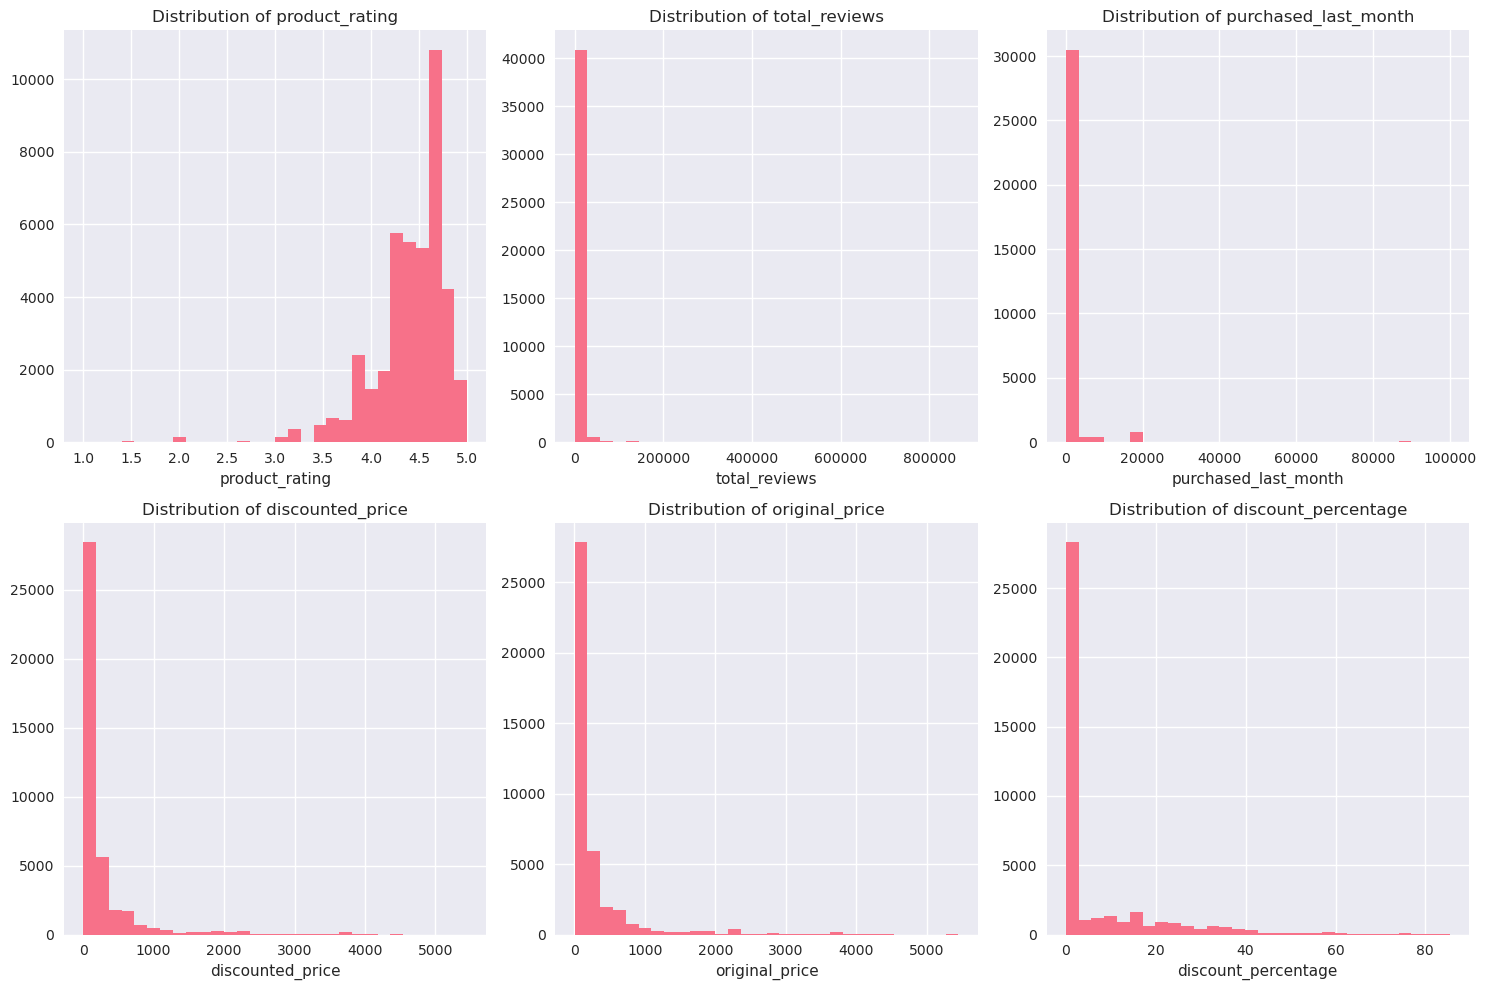

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(numeric_feature):
    row, col_idx = i // 3, i % 3
    clean_data = df[col].dropna()
    axes[row, col_idx].hist(clean_data, bins=30)
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)

plt.tight_layout()
plt.show()

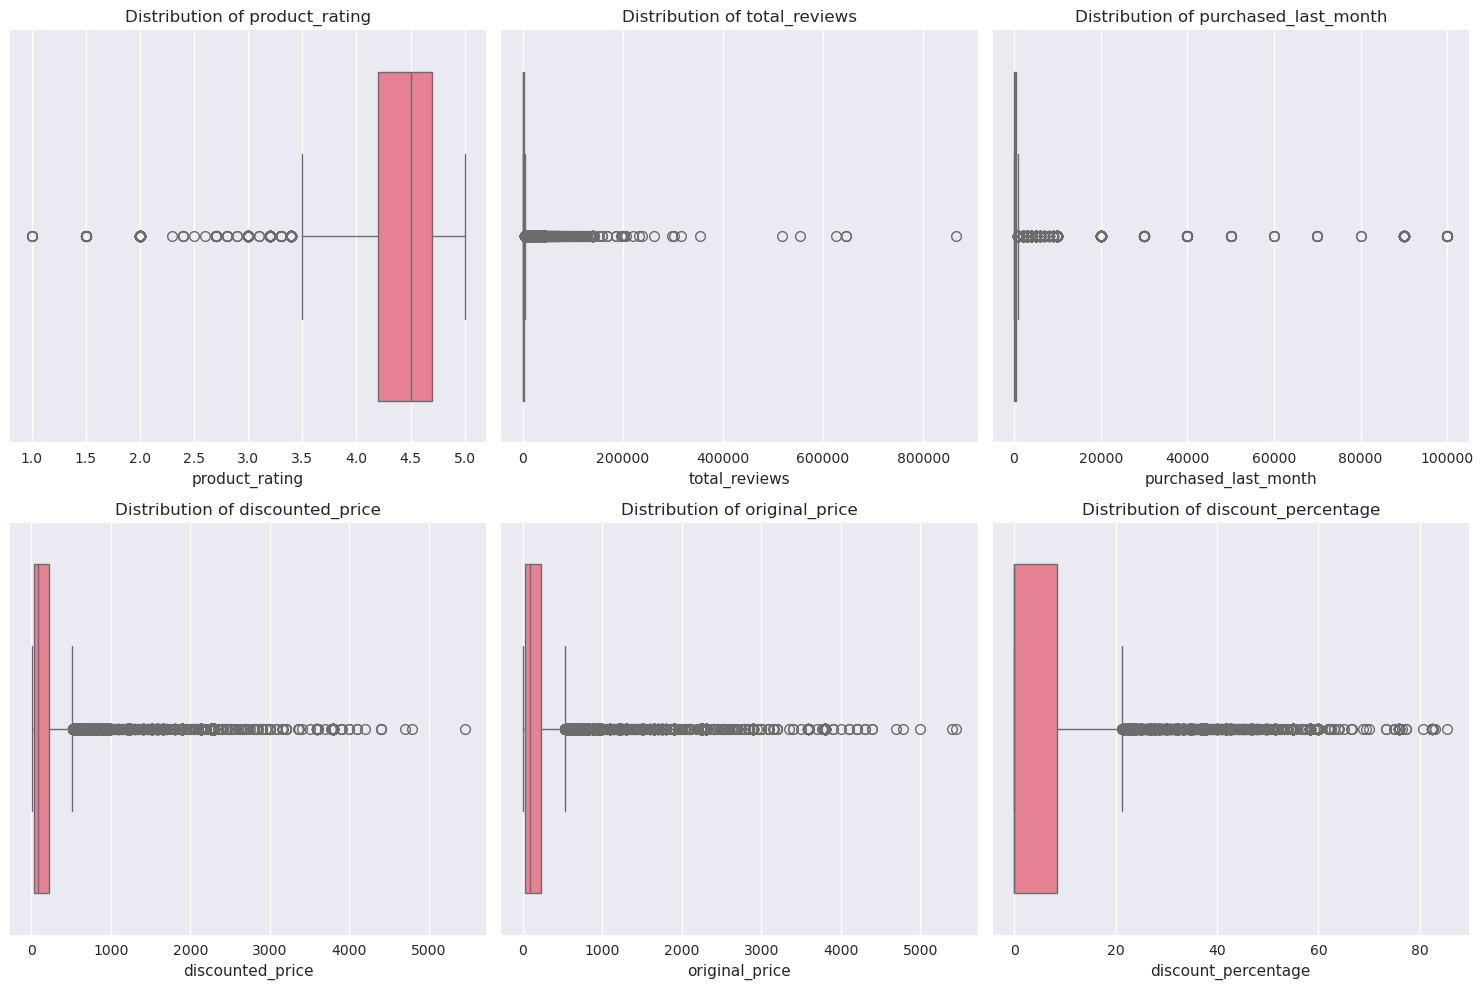

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(numeric_feature):
    row, col_idx = i // 3, i % 3
    clean_data = df[col].dropna()
    sns.boxplot(x=clean_data, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)

plt.tight_layout()
plt.show()

## *Thống kê mô tả với biến phân loại*

In [32]:
categorical_feature = ["product_title", "is_best_seller", "is_sponsored", "has_coupon", "buy_box_availability", "delivery_date", 
                       "sustainability_tags", "product_image_url", "product_page_url", "data_collected_at", "product_category"]

for col in categorical_feature:
    print(f"================== Top 10 {col} ==================")
    print("Unique value:", df[col].nunique())
    print("Missing value:", df[col].isna().sum())
    display(df[col].value_counts().head(10))

================== Top 10 product_title ==================
Unique value: 8808
Missing value: 0


product_title
Duracell Coppertop 9V Battery, 6 Count (Pack of 1), 9 Volt Battery with Long-lasting Power, All-Purpose Alkaline 9V Battery for Household and Office Devices                                     744
Energizer MAX AA Batteries (16 Pack), Double A Alkaline Batteries                                                                                                                                566
TRX Training 6 Month On-Demand Membership - Unlimited Access to Expert-Led Workouts, Personalized Programs, Strength, Cardio & Recovery - Train Anytime                                          456
KODAK 10.1 Inch WiFi Digital Picture Frame,1280x800 HD IPS Touch Screen, Electronic Smart Photo Frame with 32 GB Memory, Auto-Rotate, Instantly Share Photos/Videos Anywhere                     438
Belkin MagSafe-Compatible Charger, 3-in-1 Wireless Charging Station, Qi2-Certified 15W Wireless Charge for Apple iPhone 16 Series, Apple Watch, AirPods w/Non-Slip Base, 40W Included - Black    377
R

================== Top 10 is_best_seller ==================
Unique value: 12
Missing value: 0


is_best_seller
No Badge             40814
Amazon's               744
Limited time deal      409
Best Seller            275
Save 30%               125
Ends in                 97
Save 10%                61
Save 18%                57
Save 17%                51
Save 12%                26
Name: count, dtype: int64

================== Top 10 is_sponsored ==================
Unique value: 2
Missing value: 0


is_sponsored
Organic      35664
Sponsored     7011
Name: count, dtype: int64

================== Top 10 has_coupon ==================
Unique value: 42
Missing value: 0


has_coupon
No Coupon                    40727
Save $16.00  with coupon       438
Save 15%  with coupon          398
Save 10%  with coupon          218
Save 5%  with coupon           191
Save 50%  with coupon          123
Save $11.00  with coupon       120
Save $100.00  with coupon       97
Save 40%  with coupon           96
Save $25.00  with coupon        65
Name: count, dtype: int64

================== Top 10 buy_box_availability ==================
Unique value: 1
Missing value: 14653


buy_box_availability
Add to cart    28022
Name: count, dtype: int64

================== Top 10 delivery_date ==================
Unique value: 24
Missing value: 11983


delivery_date
2025-09-04    7862
2025-09-01    6334
2025-09-03    5238
2025-09-11    3723
2025-09-02    3401
2025-09-09    1511
2025-09-05    1001
2025-09-08     763
2025-08-30     192
2025-09-13     127
Name: count, dtype: int64

================== Top 10 sustainability_tags ==================
Unique value: 16
Missing value: 39267


sustainability_tags
Small Business               1341
Carbon impact                 769
Works with Alexa              425
Energy efficiency             262
Alexa Built-in                184
Manufacturing practices       148
Energy efficiency +3 more     121
Energy efficiency +1 more      93
Forestry practices             18
Safer chemicals +2 more        18
Name: count, dtype: int64

================== Top 10 product_image_url ==================
Unique value: 8038
Missing value: 0


product_image_url
https://m.media-amazon.com/images/I/51Xr76m2WLL._AC_UL320_.jpg    1461
https://m.media-amazon.com/images/I/41xG8Yh0rlL._AC_UL320_.jpg    1078
https://m.media-amazon.com/images/I/61ZSfHGJ2bL._AC_UL320_.jpg     744
https://m.media-amazon.com/images/I/91wM+1e9MSL._AC_UL320_.jpg     566
https://m.media-amazon.com/images/I/5179luWipKL._AC_UL320_.jpg     515
https://m.media-amazon.com/images/I/51rlsc7G2UL._AC_UL320_.jpg     456
https://m.media-amazon.com/images/I/716bPrNJ0GL._AC_UL320_.jpg     438
https://m.media-amazon.com/images/I/61XBmb46FVL._AC_UL320_.jpg     377
https://m.media-amazon.com/images/I/71yebnw2SUL._AC_UL320_.jpg     371
https://m.media-amazon.com/images/I/71+ok4zsAxL._AC_UL320_.jpg     254
Name: count, dtype: int64

================== Top 10 product_page_url ==================
Unique value: 40606
Missing value: 2069


product_page_url
https://www.amazon.com/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxNDQ2OjE3NTU4MDAwNjg6c3BfYXRmX2Jyb3dzZTozMDA2NzE0NTMwMTcyMDI6OjA6Og&url=%2FBOYA-BOYALINK-Microphone-Micophone-Cancelling%2Fdp%2FB0DNZB7TQG%2Fref%3Dsr_1_1_sspa%3Fdib%3DeyJ2IjoiMSJ9.avmZlHCQuVOwikquBqYSIjN8SVcyxtkXHQMPt7Zjzkf4TeZzrZfQETMhdWuWgtTrVz8ITKpXLHvZj0fZRjxqgMPYNMitRqeUoeIwdYfc5nnzJ8m0T8HYeedlh3YSOhJQjeHskevMUQWyg6TtoB2tHcHt-edYPsQ6VwFQTI6avsPrgVpFKrto3ff9TDR9BcRyPwM6AiYn-vh7wA5PP9DjZddhCPf7bVPcHMZ6Hwd40dQDWm9_M8R-LcwKY8wnuWRUSplhfYJBvTjAgsb3Y3y88VGpfqY3V8Rd2ge-woBzUMA.yqwi-krmElGgXIMa8kKUPx1XmaXd9lHaAkMkVVpStxo%26dib_tag%3Dse%26qid%3D1755800068%26refinements%3Dp_n_g-101014971069111%253A119653281011%26s%3Delectronics%26sr%3D1-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfYnJvd3Nl%26psc%3D1      1
https://www.amazon.com/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxNDQ2OjE3NTU4MDAwNjg6c3BfYXRmX2Jyb3dzZTozMDA4NjA2Mzc2NDIxMDI6OjA6Og&url=%2FLISEN-Charging-Lighting-MacBook-Chargers%2Fdp%2FB0DHWZCZDZ%2Fref%3Dsr

================== Top 10 data_collected_at ==================
Unique value: 1559
Missing value: 0


data_collected_at
2025-08-21 11:15:31    33
2025-08-21 11:15:58    33
2025-08-21 11:14:29    33
2025-08-21 11:16:09    33
2025-08-30 19:53:37    33
2025-08-30 19:54:27    33
2025-08-30 19:54:52    33
2025-08-30 00:39:26    33
2025-08-30 00:39:40    33
2025-08-30 00:40:06    33
Name: count, dtype: int64

================== Top 10 product_category ==================
Unique value: 15
Missing value: 0


product_category
Other Electronics    8755
Laptops              8693
Phones               6563
Cameras              3677
Power & Batteries    2877
TV & Display         2630
Chargers & Cables    1833
Storage              1630
Speakers             1345
Networking           1070
Name: count, dtype: int64

# **Tiền xử lý dữ liệu**

## *Loại bỏ NA và các cột không cần thiết*

In [33]:
cols = ["product_rating", "total_reviews", "purchased_last_month", "discounted_price", "original_price", "discount_percentage", 
        "is_sponsored", "product_category"]

data = df[cols].dropna()

In [34]:
print("\nDataset Info:")
print(f"Total samples: {len(data):,}")
print(f"Features: {data.shape[1]}")
print(f"Data Shape: {data.shape}")
print(f"Columns: {data.columns}")
print(data.head(10))


Dataset Info:
Total samples: 30,228
Features: 8
Data Shape: (30228, 8)
Columns: Index(['product_rating', 'total_reviews', 'purchased_last_month',
       'discounted_price', 'original_price', 'discount_percentage',
       'is_sponsored', 'product_category'],
      dtype='object')
    product_rating  total_reviews  purchased_last_month  discounted_price  \
0              4.6          375.0                 300.0             89.68   
1              4.3         2457.0                6000.0              9.99   
2              4.6         3044.0                2000.0            314.00   
3              4.6        35882.0               10000.0            162.24   
4              4.8        28988.0               10000.0             72.74   
5              4.6        44522.0              100000.0             99.95   
6              4.5        13466.0               10000.0             88.11   
7              4.6        38105.0               10000.0             23.04   
9              4.7        

In [35]:
target = "discounted_price"
X = data.drop(columns=target)
y = data[target]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train data Shape: {X_train.shape}")
print(f"X_test data Shape: {X_test.shape}")

X_train data Shape: (24182, 7)
X_test data Shape: (6046, 7)


## *Scale cho dữ liệu Numeric*

In [37]:
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
y_scaler = RobustScaler()

In [38]:
cols_minmax = ["product_rating", "discount_percentage"]
cols_log_robust = ["total_reviews", "purchased_last_month", "original_price"]

X_train[cols_minmax] = minmax_scaler.fit_transform(X_train[cols_minmax])
X_train[cols_log_robust] = robust_scaler.fit_transform(X_train[cols_log_robust])

X_test[cols_minmax] = minmax_scaler.transform(X_test[cols_minmax])
X_test[cols_log_robust] = robust_scaler.transform(X_test[cols_log_robust])

y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

## *Encoding cho dữ liệu Categorical*

In [39]:
onehot_cols = ["is_sponsored", "product_category"]

X_train = pd.get_dummies(X_train, onehot_cols)
X_test = pd.get_dummies(X_test, onehot_cols)

In [40]:
X_train

,product_rating,total_reviews,purchased_last_month,original_price,discount_percentage,is_sponsored_Organic,is_sponsored_Sponsored,product_category_Cameras,product_category_Chargers & Cables,product_category_Gaming,...,product_category_Networking,product_category_Other Electronics,product_category_Phones,product_category_Power & Batteries,product_category_Printers & Scanners,product_category_Smart Home,product_category_Speakers,product_category_Storage,product_category_TV & Display,product_category_Wearables
16916,0.766667,-0.122073,-0.333333,-0.076371,0.055139,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9654,0.800000,0.184110,0.333333,-0.353048,0.182861,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
36420,0.600000,-0.256954,-0.333333,0.705509,0.000000,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1985,0.766667,-0.196118,0.000000,0.299547,0.089675,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
39079,0.900000,-0.201721,0.000000,0.130284,0.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42006,0.666667,0.342205,-0.333333,0.946499,0.325217,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6901,0.733333,-0.266160,-0.333333,0.492974,0.000000,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1037,0.866667,5.713828,16.000000,-0.170557,0.702763,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
21954,0.866667,0.180909,-0.333333,-0.170792,0.442988,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# **Huấn luyện mô hình**

In [41]:
print("\n🤖 MACHINE LEARNING MODELS")
print("-" * 40)

models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor()
}

# In tên các thuật toán
print("Các thuật toán được sử dụng:")
for model_name in models.keys():
    print(f"- {model_name}")



🤖 MACHINE LEARNING MODELS
----------------------------------------
Các thuật toán được sử dụng:
- LinearRegression
- RandomForestRegressor
- SVR
- MLPRegressor


In [42]:
results = {}
predictions = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    try:
        model.fit(X_train, y_train)
        y_pred_scaled = model.predict(X_test)
        y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

        # Dùng metrics cho regression
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2  = r2_score(y_test, y_pred)

        results[name] = {"MSE": mse, "MAE": mae, "R2": r2}
        predictions[name] = y_pred

        print(f"✅ {name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

    except Exception as e:
        print(f"❌ Error training {name}: {str(e)}")
        results[name] = {"MSE": None, "MAE": None, "R2": None}
        predictions[name] = np.zeros(len(y_test))



🔄 Training LinearRegression...
✅ LinearRegression - MSE: 8687.0168, MAE: 43.3003, R2: 0.8714

🔄 Training RandomForestRegressor...


✅ RandomForestRegressor - MSE: 22.1344, MAE: 0.4234, R2: 0.9997

🔄 Training SVR...
✅ SVR - MSE: 9028.7176, MAE: 17.6028, R2: 0.8663

🔄 Training MLPRegressor...
✅ MLPRegressor - MSE: 39.9195, MAE: 2.8107, R2: 0.9994
